### Task: Train model on MNIST dataset

# Import Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd


# Load MNIST Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Number of Instances per Class

<ipython-input-4-f29a646cc9c8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique, y=counts, palette='viridis')


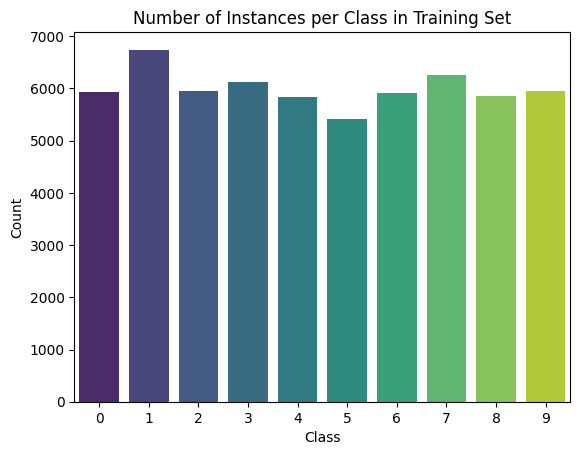

In [4]:
unique, counts = np.unique(y_train, return_counts=True)
sns.barplot(x=unique, y=counts, palette='viridis')
plt.title('Number of Instances per Class in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


# Check for Null Values

In [5]:
def check_null_values(data, labels):
    nulls_data = np.isnan(data).sum()
    nulls_labels = np.isnan(labels).sum()
    print(f"Null values in data: {nulls_data}, Null values in labels: {nulls_labels}")

check_null_values(x_train, y_train)
check_null_values(x_test, y_test)


Null values in data: 0, Null values in labels: 0
Null values in data: 0, Null values in labels: 0


# Preprocess the Data

In [6]:
from sklearn.model_selection import train_test_split


x_train = x_train / 255.0  # Normalize to [0, 1]
x_test = x_test / 255.0


x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Stratified Split to maintain the same class distribution in training and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42, stratify=y_train
)


# Build the Model

In [8]:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Add dropout layer to reduce overfitting
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Add dropout layer to reduce overfitting
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Add dropout layer before the final dense layer
    layers.Dense(10, activation='softmax')
])
model.summary()
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [9]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 59s 34ms/step - accuracy: 0.7702 - loss: 0.6900 - val_accuracy: 0.9775 - val_loss: 0.0800
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9515 - loss: 0.1649 - val_accuracy: 0.9852 - val_loss: 0.0607
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9638 - loss: 0.1200 - val_accuracy: 0.9853 - val_loss: 0.0533
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9726 - loss: 0.0957 - val_accuracy: 0.9872 - val_loss: 0.0530
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9747 - loss: 0.0848 - val_accuracy: 0.9887 - val_loss: 0.0424
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9749 - loss: 0.0782 - val_accuracy: 0.9877 - val_loss: 0.0461
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9782 - loss: 0.0744 - val_accuracy: 0.9890 - val_loss: 0.0423
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 56s 33ms/step - accuracy: 0.9801 -

# Plot Training and Validation Accuracy and Loss

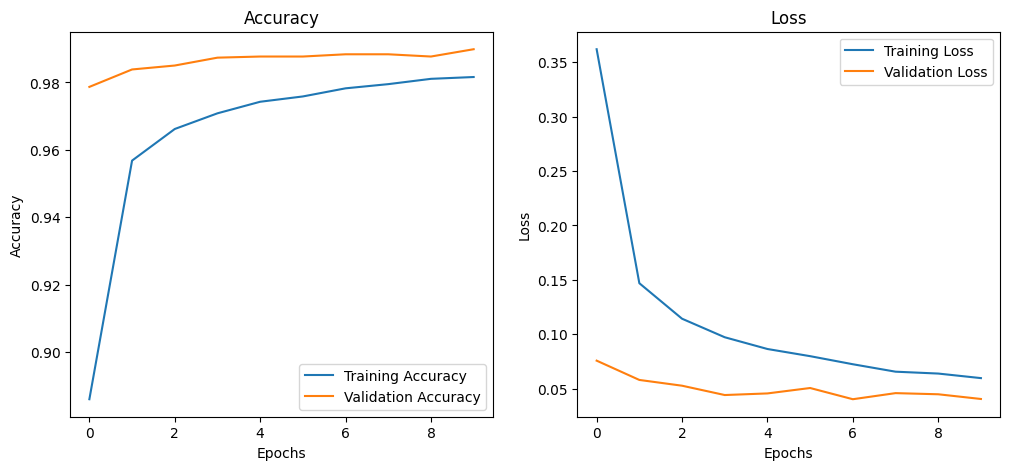

In [14]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Evaluate the Model

In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9899 - loss: 0.0295
Test accuracy: 0.99


# Predict Classes for the Test Set

In [10]:
# Predict classes for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# Confusion Matrix

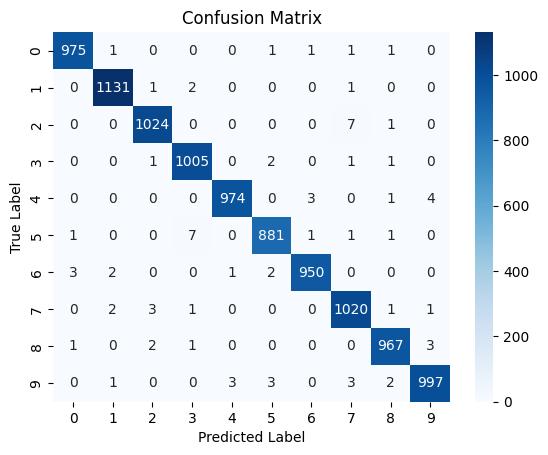

In [11]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Classification Report

In [12]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# Save the Model

In [ ]:
model.save('mnist_model.h5')